## Importing the dataset


In [54]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)
# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [3]:
df=pd.concat([X,y], axis=1)

In [4]:
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [5]:
df.tail()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [6]:
df.nunique()

radius1               456
texture1              479
perimeter1            522
area1                 539
smoothness1           474
compactness1          537
concavity1            537
concave_points1       542
symmetry1             432
fractal_dimension1    499
radius2               540
texture2              519
perimeter2            533
area2                 528
smoothness2           547
compactness2          541
concavity2            533
concave_points2       507
symmetry2             498
fractal_dimension2    545
radius3               457
texture3              511
perimeter3            514
area3                 544
smoothness3           411
compactness3          529
concavity3            539
concave_points3       492
symmetry3             500
fractal_dimension3    535
Diagnosis               2
dtype: int64

In [7]:
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [9]:
df.shape

(569, 31)

## Check the type of each column

In [10]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

radius1: float64
texture1: float64
perimeter1: float64
area1: float64
smoothness1: float64
compactness1: float64
concavity1: float64
concave_points1: float64
symmetry1: float64
fractal_dimension1: float64
radius2: float64
texture2: float64
perimeter2: float64
area2: float64
smoothness2: float64
compactness2: float64
concavity2: float64
concave_points2: float64
symmetry2: float64
fractal_dimension2: float64
radius3: float64
texture3: float64
perimeter3: float64
area3: float64
smoothness3: float64
compactness3: float64
concavity3: float64
concave_points3: float64
symmetry3: float64
fractal_dimension3: float64
Diagnosis: object


## change the type of Diagnosis column to string


In [11]:
df["Diagnosis"] = df["Diagnosis"].astype("string")

## Check the number of not available values in each column

In [12]:
df.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

### check if there are 0s where 0 is meaningless

In [13]:
for i in df.columns:
    print(i,len(df[df[i] == 0]))

radius1 0
texture1 0
perimeter1 0
area1 0
smoothness1 0
compactness1 0
concavity1 13
concave_points1 13
symmetry1 0
fractal_dimension1 0
radius2 0
texture2 0
perimeter2 0
area2 0
smoothness2 0
compactness2 0
concavity2 13
concave_points2 13
symmetry2 0
fractal_dimension2 0
radius3 0
texture3 0
perimeter3 0
area3 0
smoothness3 0
compactness3 0
concavity3 13
concave_points3 13
symmetry3 0
fractal_dimension3 0
Diagnosis 0


# Handling meaningless 0s

In [14]:
#replace "?" with Nan
df= df.replace({0: None})
# Replace 'None' values with NaN
df.fillna(value=np.nan, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2892\3609150778.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(value=np.nan, inplace=True)


### since only few rows has missing values, we can safely remove them 

In [15]:
df = df.dropna()

## Check the count of each value in the y column

In [16]:
import matplotlib.pyplot as plt
counts = df["Diagnosis"].value_counts()
counts

Diagnosis
B    344
M    212
Name: count, dtype: Int64

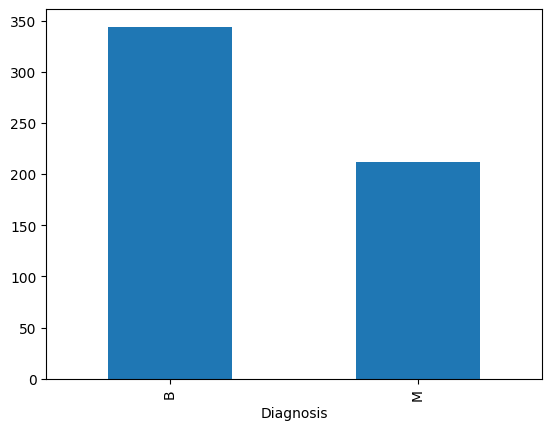

In [17]:
counts.plot(kind="bar")
plt.show()

## Check the number of duplicated values

In [18]:
df.duplicated().sum()

0

## Plot a histogram for other columns

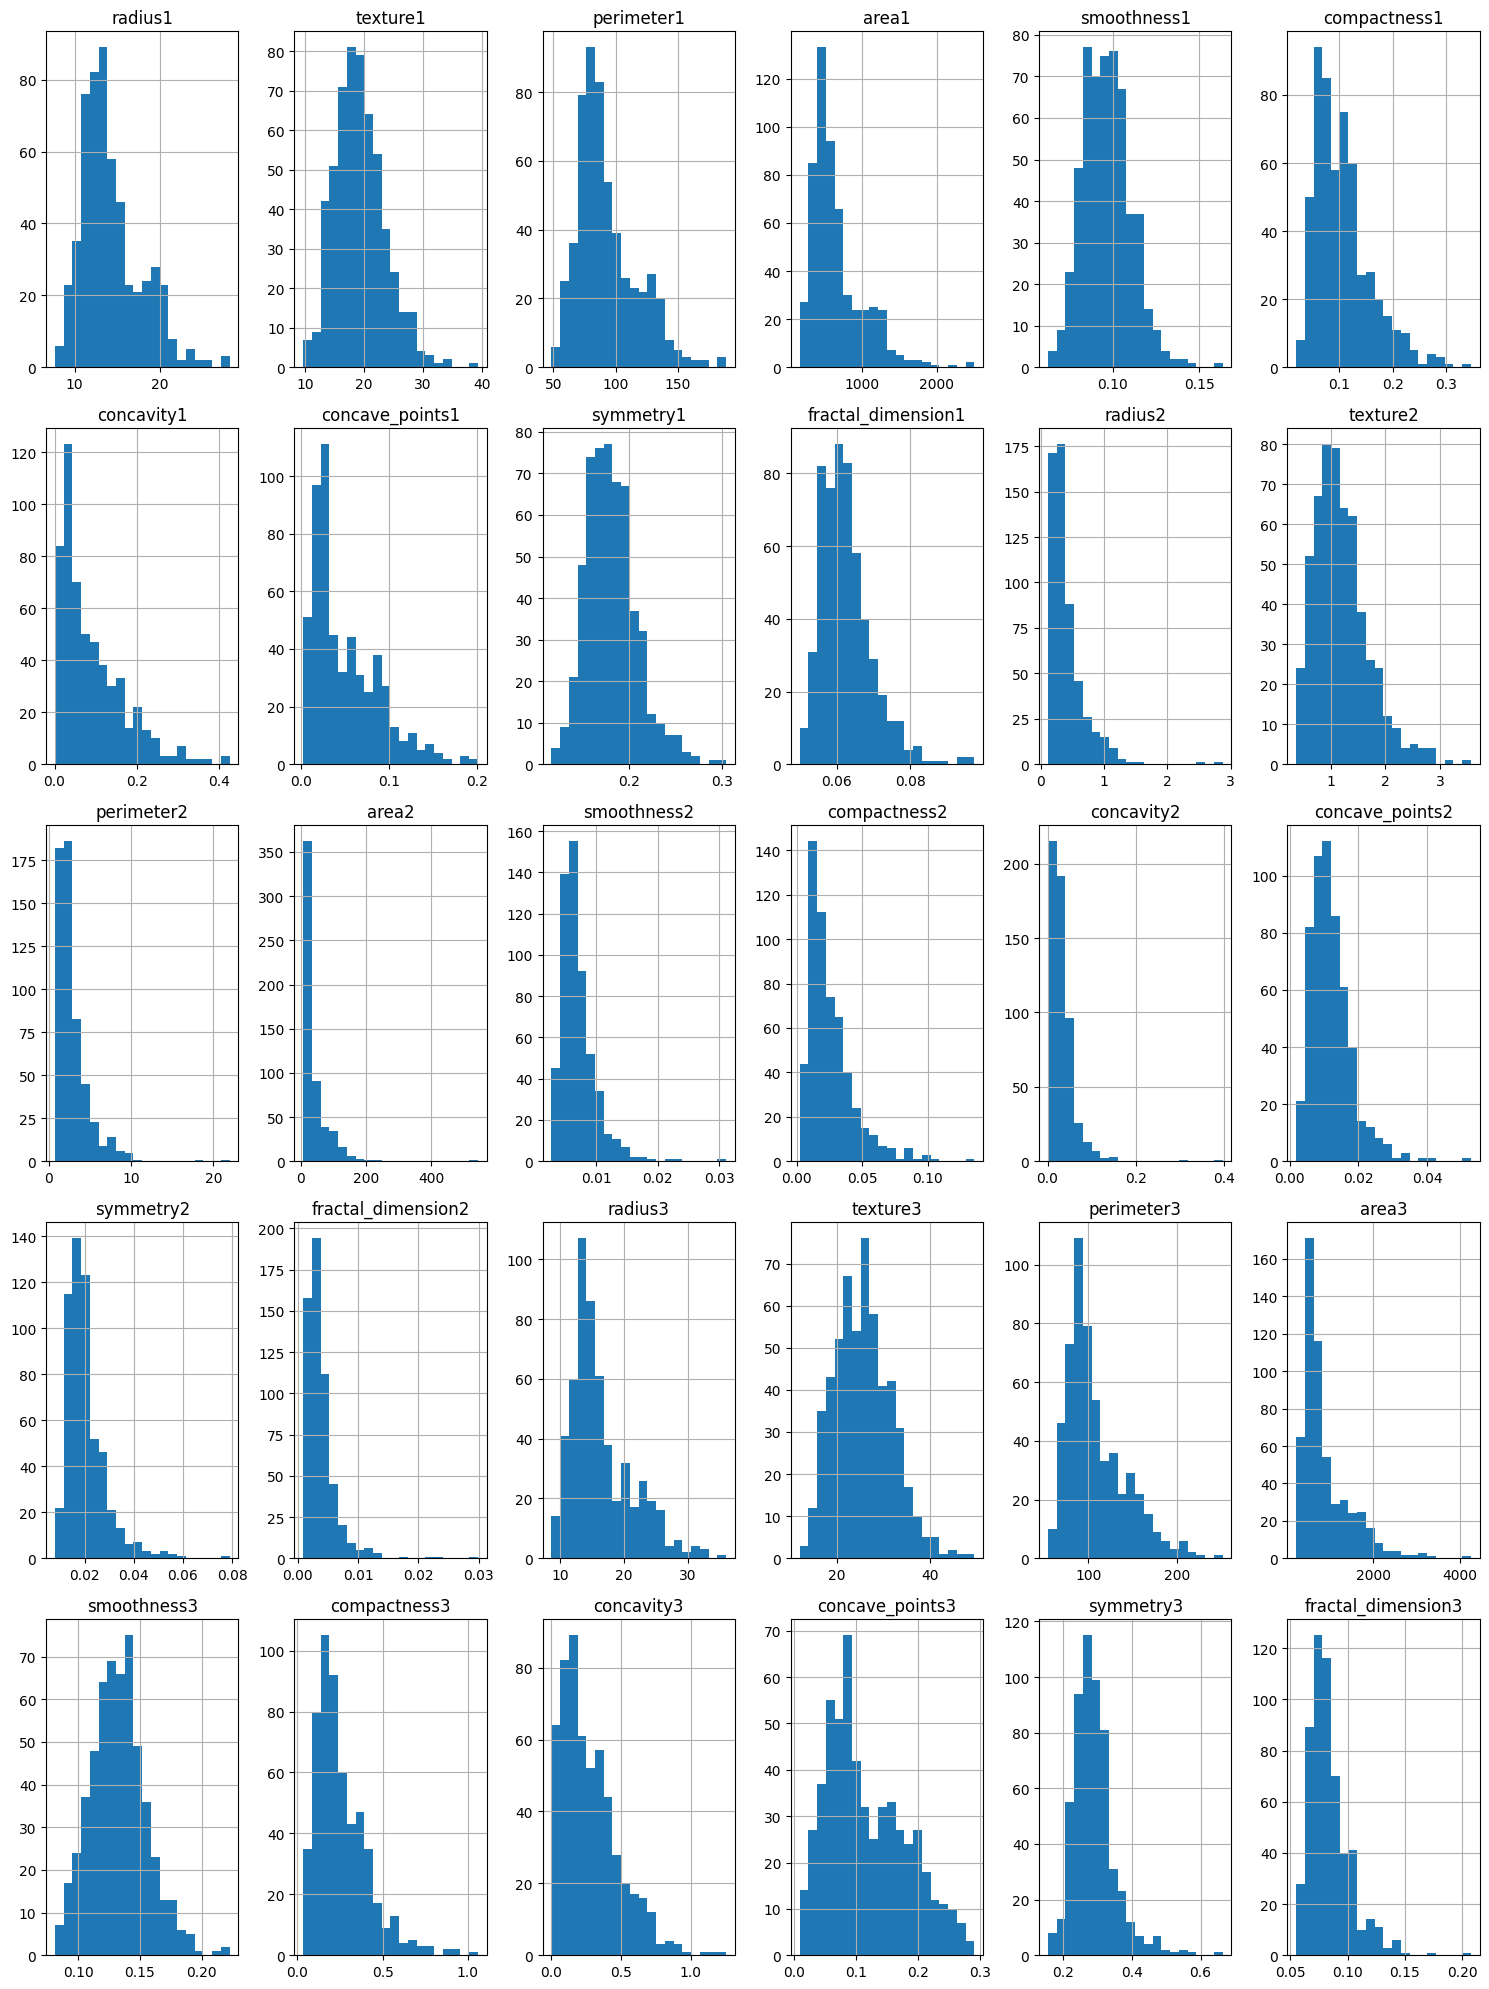

In [19]:

# Calculate the number of rows and columns needed for subplots
num_rows = 5
num_cols = 6

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(df.drop("Diagnosis", axis=1).columns):
    df[col].hist(ax=axes[i], bins=20)
    axes[i].set_title(col)

# Hide any remaining empty subplots
for i in range(len(df.drop("Diagnosis", axis=1).columns), len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Plotting the box plots

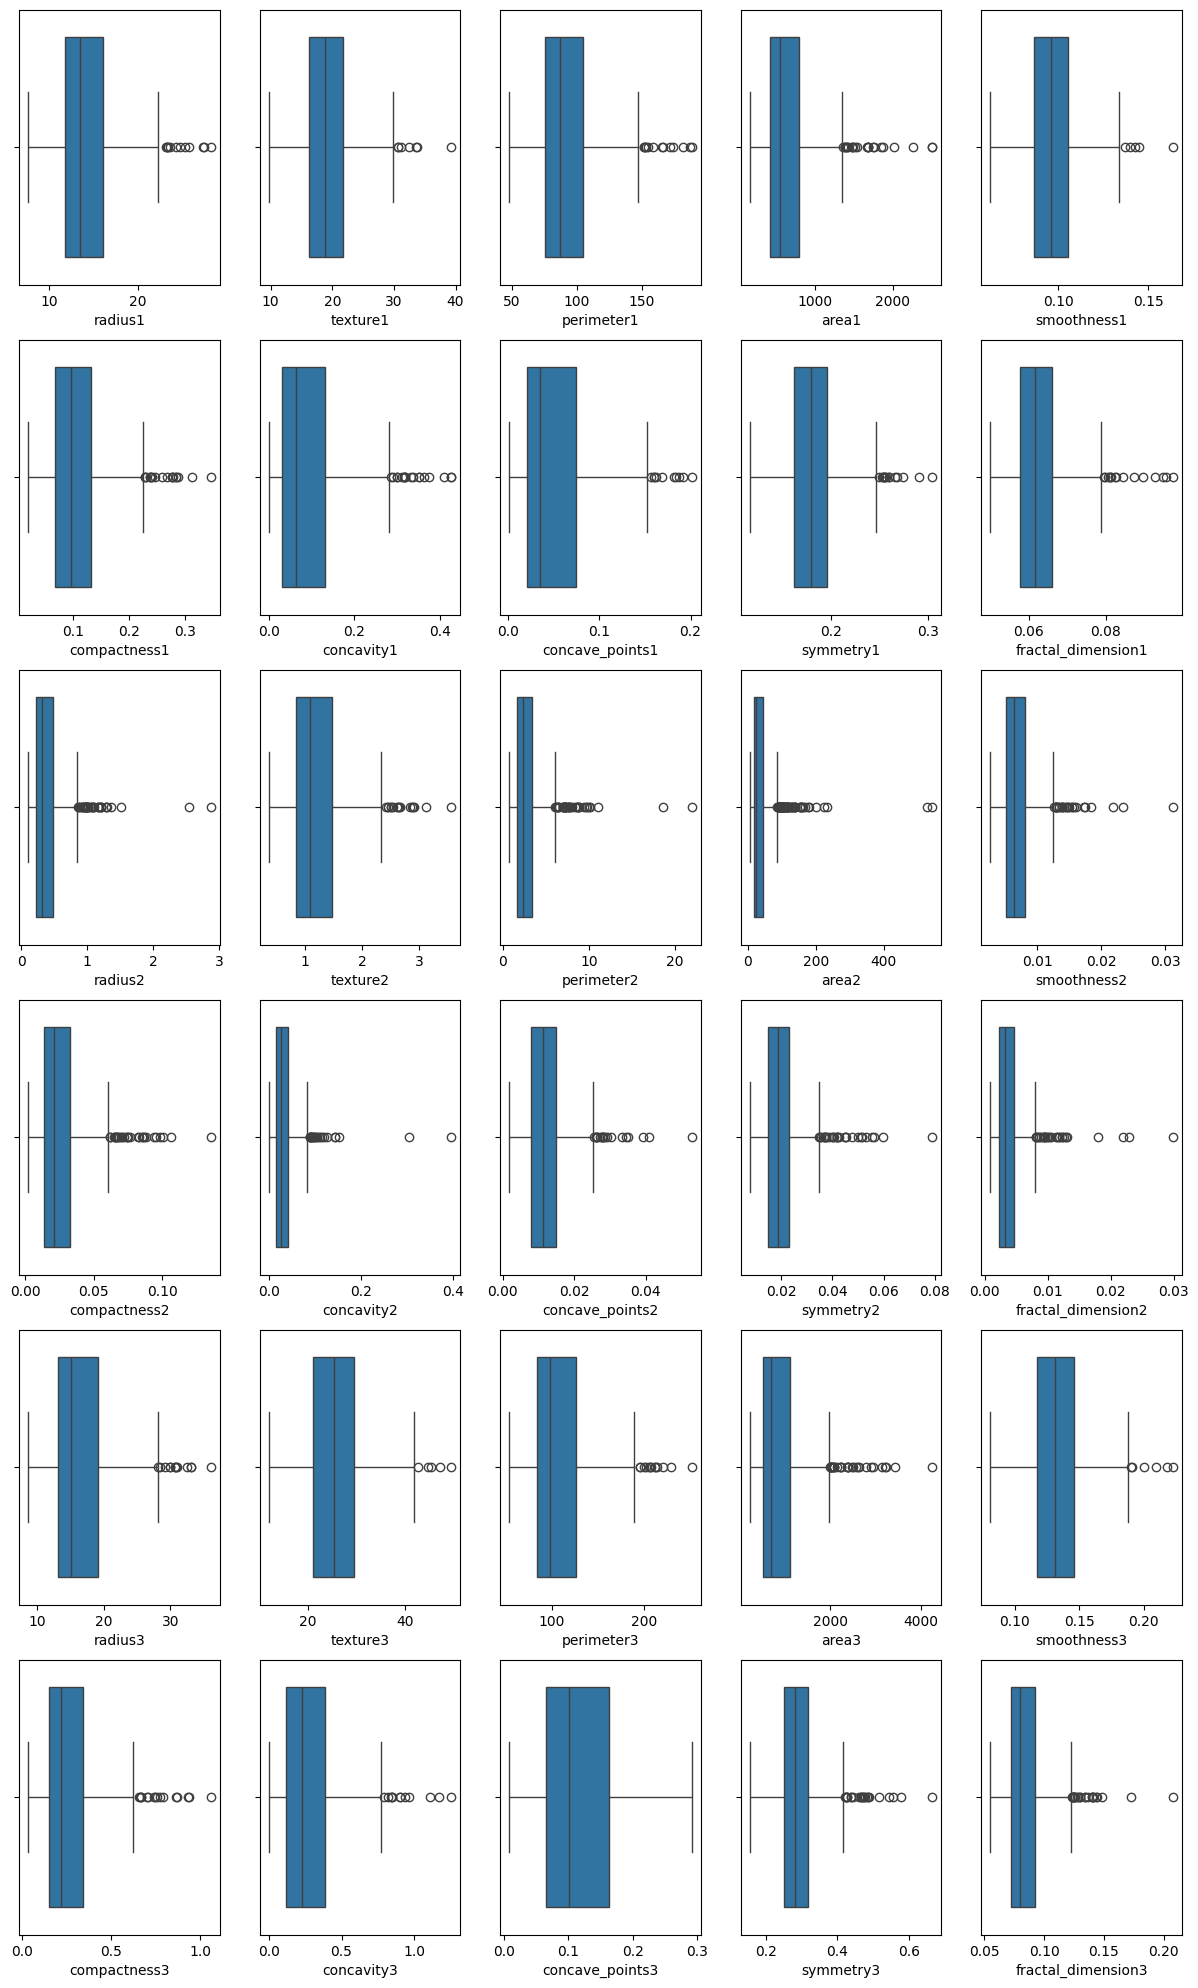

In [20]:
import seaborn as sns
# Calculate the number of rows and columns needed for subplots
num_rows = 6
num_cols = 5

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(df.columns):
    if col != "Diagnosis":
        sns.boxplot(x=df[col], ax=axes[i])

# Hide any remaining empty subplots
for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')


# Show the plot
plt.show()


## Replace M with 1 and B in 0 in the lable column

In [21]:
label_mapping = {'M':1  , 'B': 0}
# Transform encoded labels back to original labels using the mapping
df["Diagnosis"] = df["Diagnosis"].map(label_mapping)


## Plotting a correlation heatmap

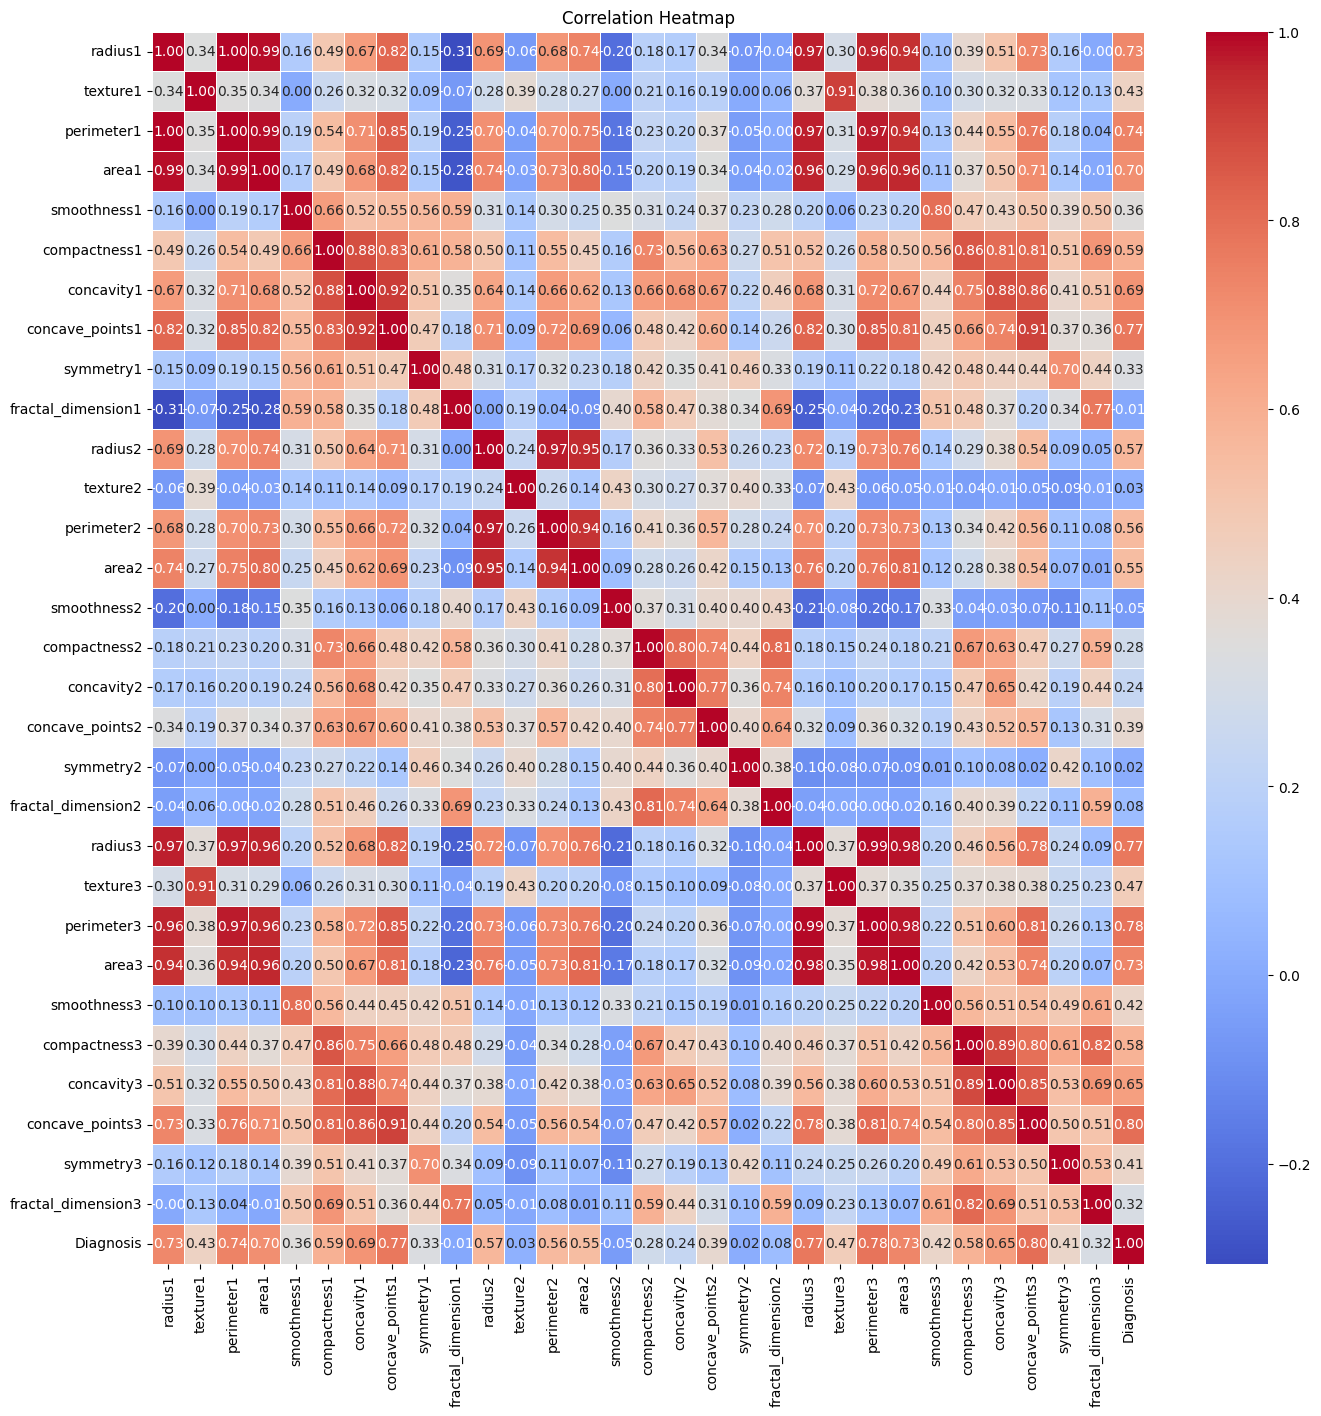

In [22]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Plot the correlation with the lable column in a ascending order

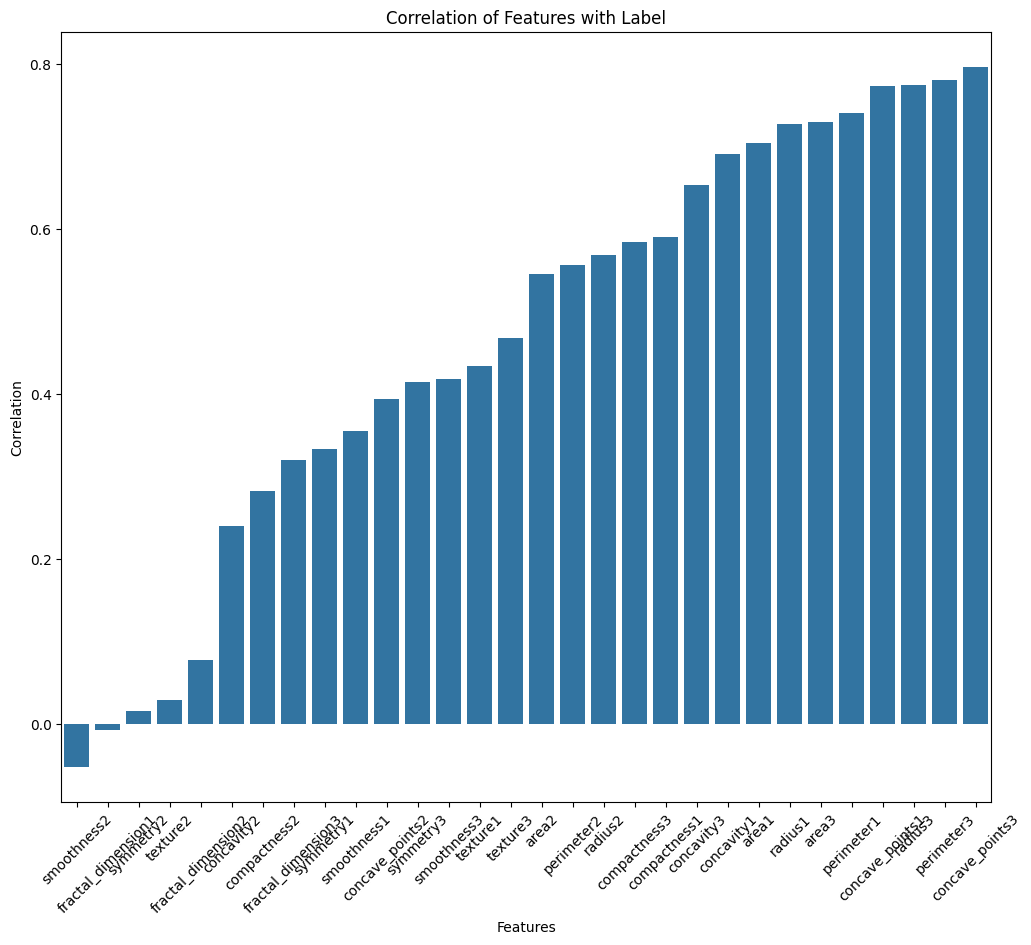

In [23]:
# Compute correlation with label column
correlation = df.drop('Diagnosis', axis=1).corrwith(df['Diagnosis'])
correlation = correlation.sort_values()
# Plot correlations
plt.figure(figsize=(12, 10))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Correlation of Features with Label')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

## Exploring the mean and standard deviation of each column

In [24]:
# Calculate mean of each column
mean_values = df.mean()

# Calculate standard deviation of each column
std_values = df.std()

# Create a new DataFrame to store mean and standard deviation
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})
stats_df

,Mean,Standard Deviation
radius1,14.237565,3.482170
texture1,19.259748,4.246993
perimeter1,92.736673,24.006362
area1,663.734712,350.893313
smoothness1,0.096616,0.013895
compactness1,0.105679,0.052643
concavity1,0.090876,0.079468
concave_points1,0.050063,0.038517
symmetry1,0.181278,0.027446
fractal_dimension1,0.062746,0.007059


## replacing the values outside of the 3 sigma of each column with the mean of that column

In [25]:
cleaned_df = df.copy()  # Create a copy of the original DataFrame

for col in df.columns:
    if col != "Diagnosis":
        lower_limit = df[col].mean() - 3 * df[col].std()
        upper_limit = df[col].mean() + 3 * df[col].std()

        # Replace values outside the threshold with the mean of the column
        cleaned_df[col] = df[col].apply(lambda x: df[col].mean() if (x < lower_limit or x > upper_limit) else x)
cleaned_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.118400,0.105679,0.300100,0.14710,0.2419,0.078710,...,17.33,184.60,2019.0,0.162200,0.665600,0.711900,0.2654,0.460100,0.118900,1
1,20.57,17.77,132.90,1326.0,0.084740,0.078640,0.086900,0.07017,0.1812,0.056670,...,23.41,158.80,1956.0,0.123800,0.186600,0.241600,0.1860,0.275000,0.089020,1
2,19.69,21.25,130.00,1203.0,0.109600,0.159900,0.197400,0.12790,0.2069,0.059990,...,25.53,152.50,1709.0,0.144400,0.424500,0.450400,0.2430,0.361300,0.087580,1
3,11.42,20.38,77.58,386.1,0.096616,0.105679,0.241400,0.10520,0.2597,0.062746,...,26.50,98.87,567.7,0.132824,0.258472,0.686900,0.2575,0.290802,0.084141,1
4,20.29,14.34,135.10,1297.0,0.100300,0.132800,0.198000,0.10430,0.1809,0.058830,...,16.67,152.20,1575.0,0.137400,0.205000,0.400000,0.1625,0.236400,0.076780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.109900,0.223600,0.317400,0.14740,0.2149,0.068790,...,29.41,179.10,1819.0,0.140700,0.418600,0.659900,0.2542,0.292900,0.098730,1
564,21.56,22.39,142.00,1479.0,0.111000,0.115900,0.243900,0.13890,0.1726,0.056230,...,26.40,166.10,2027.0,0.141000,0.211300,0.410700,0.2216,0.206000,0.071150,1
565,20.13,28.25,131.20,1261.0,0.097800,0.103400,0.144000,0.09791,0.1752,0.055330,...,38.25,155.00,1731.0,0.116600,0.192200,0.321500,0.1628,0.257200,0.066370,1
566,16.60,28.08,108.30,858.1,0.084550,0.102300,0.092510,0.05302,0.1590,0.056480,...,34.12,126.70,1124.0,0.113900,0.309400,0.340300,0.1418,0.221800,0.078200,1


## Let's check box plots again

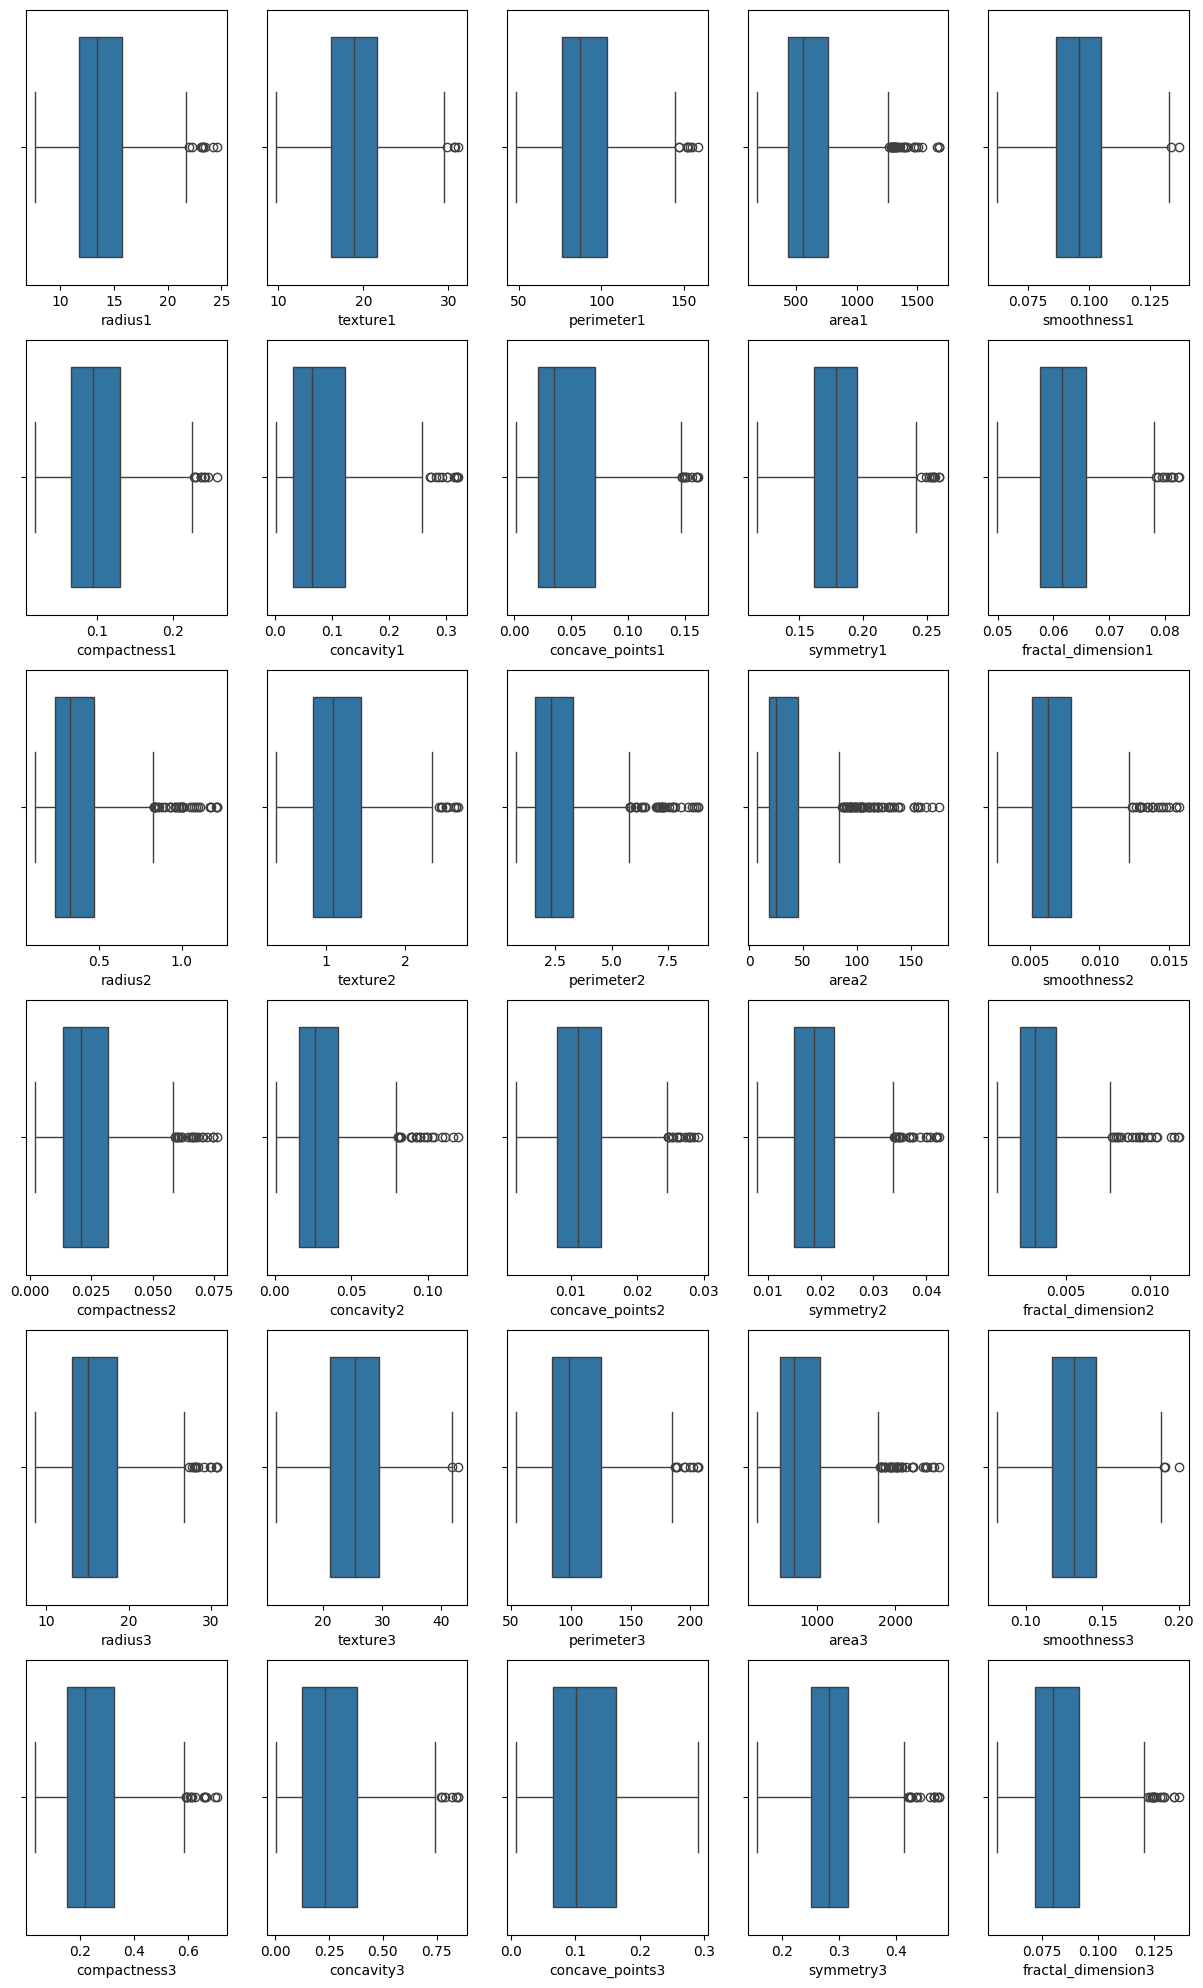

In [26]:
import seaborn as sns
# Calculate the number of rows and columns needed for subplots
num_rows = 6
num_cols = 5

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(cleaned_df.drop("Diagnosis", axis=1).columns):
    sns.boxplot(x=cleaned_df[col], ax=axes[i])

# Hide any remaining empty subplots
for i in range(len(cleaned_df.drop("Diagnosis", axis=1).columns), len(axes)):
    axes[i].axis('off')


# Show the plot
plt.show()

## Min-Max scaling the data

In [27]:
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(cleaned_df)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=cleaned_df.columns)

scaled_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,0.608005,0.031294,0.673480,0.548034,0.749296,0.362265,0.937384,0.906961,0.875524,0.880551,...,0.172571,0.854245,0.767790,0.678257,0.935673,0.838263,0.909293,0.949937,0.784907,1.0
1,0.760316,0.376460,0.764834,0.762470,0.298029,0.248762,0.269899,0.426593,0.451049,0.205513,...,0.370166,0.684853,0.740848,0.356514,0.225707,0.283045,0.627960,0.370776,0.417650,1.0
2,0.708365,0.539000,0.738603,0.681314,0.631318,0.589875,0.615852,0.787072,0.630769,0.307198,...,0.439064,0.643490,0.635221,0.529116,0.578319,0.529546,0.829925,0.640801,0.399951,1.0
3,0.220143,0.498365,0.264472,0.142320,0.457253,0.362265,0.753607,0.645328,1.000000,0.391622,...,0.470588,0.291379,0.147152,0.432128,0.332234,0.808749,0.881302,0.420218,0.357683,1.0
4,0.743787,0.216254,0.784732,0.743336,0.506636,0.476115,0.617730,0.639708,0.448951,0.271669,...,0.151121,0.641521,0.577917,0.470465,0.252979,0.470046,0.544694,0.250000,0.267207,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.780979,0.718356,0.856187,0.776326,0.635340,0.857275,0.991547,0.908834,0.686713,0.576723,...,0.565161,0.818134,0.682261,0.498115,0.569574,0.776874,0.869609,0.426783,0.536996,1.0
552,0.818761,0.592247,0.847142,0.863420,0.650087,0.405172,0.761434,0.855758,0.390909,0.192037,...,0.467338,0.732782,0.771211,0.500628,0.262317,0.482678,0.754100,0.154881,0.198009,1.0
553,0.734341,0.865950,0.749457,0.719583,0.473120,0.352699,0.448668,0.599808,0.409091,0.164472,...,0.852454,0.659904,0.644629,0.296188,0.234007,0.377372,0.545757,0.315081,0.139258,1.0
554,0.525946,0.858010,0.542330,0.453748,0.295482,0.348082,0.287463,0.319504,0.295804,0.199694,...,0.718232,0.474099,0.385050,0.273565,0.407719,0.399567,0.471349,0.204318,0.284661,1.0


## Defining a function for evaluating the accuracy of each method

In [28]:
def accuracy_evaluation(xTrain, yTrain, xTest, yTest):
  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(xTrain , yTrain)
  y_pred = model.predict(xTest)
  score = accuracy_score(yTest, y_pred)
  print(f'Accuracy is:{score}')

## Train Test Split

In [29]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(scaled_df.drop("Diagnosis" , axis=1), scaled_df["Diagnosis"], test_size=0.4, random_state=42)

## Since our data is inbalanced, we need to balace our data

## Performing under sampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


## Feature selection via variance method

In [31]:
# Initialize VarianceThreshold with a threshold (e.g., 0.5)
threshold = 0.01
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(X_resampled)

# Get the indices of the features that are selected
selected_features_idx = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X_resampled.columns[selected_features_idx]

# Filter the original DataFrame to keep only selected features
selected_data = X_resampled[selected_features]

## Calculating the accuracy of this method

In [32]:
accuracy_evaluation(X_resampled[selected_features],y_resampled , X_val[selected_features], y_val)

Accuracy is:0.9417040358744395


## Feature selection via forward feature selection method

In [33]:

from sklearn.neighbors import KNeighborsClassifier


# Initialize an empty set of selected features
selected_features = []
best_features = []
best_score = -float("inf")

# Define a stopping criterion (e.g., maximum number of features to select)

for feature in X_resampled.columns:
    # Initialize a model (e.g., K Nearest Neighbors)
    model = KNeighborsClassifier(n_neighbors=1)
    selected_features.append(feature)
    model.fit(X_resampled[selected_features] , y_resampled)
    # Evaluate model performance
    y_pred = model.predict(X_val[selected_features])
    score = accuracy_score(y_val, y_pred)
    # Check if this feature improves the model
    if score > best_score:
        best_score = score
        best_features.append(feature)
    else:
        break
best_features



['radius1', 'texture1', 'perimeter1']

## Feature selection Via backward feature selection method

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize an empty set of selected features
selected_features = []
best_features = []
best_score = -float("inf")

# Define a stopping criterion (e.g., maximum number of features to select)

for feature in X_resampled.columns[::-1]:
    # Initialize a model (e.g., K Nearest Neighbors)
    model = KNeighborsClassifier(n_neighbors=1)
    selected_features.append(feature)
    model.fit(X_resampled[selected_features] , y_resampled)
    # Evaluate model performance
    y_pred = model.predict(X_val[selected_features])
    score = accuracy_score(y_val, y_pred)
    # Check if this feature improves the model
    if score > best_score:
        best_score = score
        best_features.append(feature)
    else:
        break




## Evaluating backward method

In [35]:
accuracy_evaluation(X_resampled[best_features],y_resampled , X_val[best_features], y_val)

Accuracy is:0.5695067264573991


## Feature selection via Genetic Algorithm

In [36]:
# Initialize a classifier (e.g., K Nearest Neighbors)
classifier = KNeighborsClassifier(n_neighbors=1)
# Initialize GeneticSelectionCV for feature selection
selector = GAFeatureSelectionCV(estimator=classifier,
                              scoring='accuracy',
                              population_size=50,
                              generations=20,
                              n_jobs=-1)
# Perform feature selection
selector.fit(X_resampled, y_resampled)


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.930938	0.0148171  	0.956876   	0.879398   
1  	100   	0.941191	0.0087159  	0.952547   	0.918026   
2  	100   	0.94083 	0.00963277 	0.961261   	0.918026   
3  	100   	0.943455	0.0109067  	0.965479   	0.918082   
4  	100   	0.945783	0.0109382  	0.965479   	0.913975   
5  	100   	0.947933	0.00859258 	0.965479   	0.931013   
6  	100   	0.952576	0.00802044 	0.965479   	0.931013   
7  	100   	0.949902	0.012137   	0.965479   	0.913808   
8  	100   	0.948264	0.0130593  	0.965479   	0.909479   
9  	100   	0.950079	0.0122096  	0.965479   	0.918137   
10 	100   	0.954721	0.00899604 	0.965479   	0.931013   
11 	100   	0.95566 	0.0105382  	0.969752   	0.922411   
12 	100   	0.953513	0.0114717  	0.965479   	0.918026   
13 	100   	0.957981	0.00898939 	0.969697   	0.935287   
14 	100   	0.957629	0.0125147  	0.974081   	0.913642   
15 	100   	0.954715	0.013068   	0.969808   	0.913808   
16 	100   	0.952819	0.0146442  	0.969808   	0.89

GAFeatureSelectionCV(estimator=KNeighborsClassifier(n_neighbors=1),
                     generations=20, n_jobs=-1, scoring='accuracy')

In [37]:
accuracy_evaluation(X_resampled.loc[:,selector.best_features_],y_resampled , X_val.loc[:,selector.best_features_], y_val)

Accuracy is:0.9282511210762332


## So we will use the selected features via GA

In [38]:
selected_df = scaled_df.loc[:,np.append(selector.best_features_ , True)]


In [39]:
selected_df

,radius1,perimeter1,smoothness1,compactness1,concave_points1,radius2,texture2,perimeter2,area2,symmetry2,fractal_dimension2,texture3,perimeter3,smoothness3,concave_points3,Diagnosis
0,0.608005,0.673480,0.749296,0.362265,0.906961,0.891255,0.236609,0.965721,0.863876,0.641079,0.486734,0.172571,0.854245,0.678257,0.909293,1.0
1,0.760316,0.764834,0.298029,0.248762,0.426593,0.391482,0.162210,0.325647,0.396457,0.173903,0.242274,0.370166,0.684853,0.356514,0.627960,1.0
2,0.708365,0.738603,0.631318,0.589875,0.787072,0.574626,0.185216,0.472010,0.514019,0.423121,0.337725,0.439064,0.643490,0.529116,0.829925,1.0
3,0.220143,0.264472,0.457253,0.362265,0.645328,0.348074,0.345429,0.331443,0.120379,0.359837,0.763716,0.470588,0.291379,0.432128,0.881302,1.0
4,0.743787,0.784732,0.506636,0.476115,0.639708,0.585138,0.182785,0.577189,0.516435,0.280132,0.387701,0.151121,0.641521,0.470465,0.544694,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.780979,0.856187,0.635340,0.857275,0.908834,0.770911,0.289001,0.986560,0.659984,0.367257,0.488572,0.565161,0.818134,0.498115,0.869609,1.0
552,0.818761,0.847142,0.650087,0.405172,0.855758,0.964658,0.388836,0.852774,0.895108,0.094304,0.307224,0.467338,0.732782,0.500628,0.754100,1.0
553,0.734341,0.749457,0.473120,0.352699,0.599808,0.592660,0.912753,0.548212,0.543542,0.321234,0.147283,0.852454,0.659904,0.296188,0.545757,1.0
554,0.525946,0.542330,0.295482,0.348082,0.319504,0.312551,0.310270,0.328977,0.246014,0.153352,0.275346,0.718232,0.474099,0.273565,0.471349,1.0


# AGNES clustering

In [43]:
X = np.array(selected_df.drop("Diagnosis", axis=1))

In [45]:
# Instantiate the model
clustering = AgglomerativeClustering(linkage='ward', n_clusters=2)
# Fit model
clustering.fit(X)

AgglomerativeClustering()

## Evaluation metrics: <br>
We will use 1-average within cluster distance , 2-Between-Cluster Distance and 3-Silhouette Coefficient

### Average within cluster distance

In [49]:
# Extract the cluster labels
labels = clustering.labels_

In [50]:
# Function to calculate the average within-cluster distance
def average_within_cluster_distance(X, labels):
    unique_labels = np.unique(labels)
    average_distances = []
    
    for label in unique_labels:
        cluster_points = X[labels == label]
        # Calculate pairwise distances within the cluster
        if len(cluster_points) > 1:  # Ensure there are at least two points to calculate distance
            distances = pairwise_distances(cluster_points)
            avg_distance = np.sum(distances) / (2 * len(cluster_points))
            average_distances.append(avg_distance)
        else:
            average_distances.append(0)  # If only one point, distance is zero

    # Calculate the average of the averages for a global measure
    overall_average = np.mean(average_distances)
    return overall_average

# Calculate the average within-cluster distance
avg_distance = average_within_cluster_distance(X, labels)
print("Average Within-Cluster Distance:", avg_distance)


Average Within-Cluster Distance: 109.7668011334092


### 2-Between-Cluster Distance

In [51]:
# Calculate cluster centroids
def calculate_centroids(X, labels):
    unique_labels = np.unique(labels)
    centroids = []
    for label in unique_labels:
        centroids.append(np.mean(X[labels == label], axis=0))
    return np.array(centroids)

# Calculate centroids
centroids = calculate_centroids(X, labels)

# Calculate the minimum distance between any two centroids
def min_inter_cluster_distance(centroids):
    dist_matrix = pairwise_distances(centroids)
    np.fill_diagonal(dist_matrix, np.inf)  # Fill diagonal with infinite to ignore zero distance of clusters to themselves
    return np.min(dist_matrix)

# Get the minimum inter-cluster distance
min_distance = min_inter_cluster_distance(centroids)
print("Minimum Between-Cluster Distance:", min_distance)

Minimum Between-Cluster Distance: 1.017807849262123


### 3-Silhouette Coefficient

In [53]:
# Calculate the Silhouette Coefficient
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient: ", silhouette_avg)

Silhouette Coefficient:  0.3721415032122353


## K-means clustering

In [55]:
# Instantiate the model
clustering = kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Fit model
clustering.fit(X)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2, n_init=10, random_state=0)

## Evaluation metrics: <br>
We will use 1-average within cluster distance , 2-Between-Cluster Distance and 3-Silhouette Coefficient

### Average within cluster distance

In [56]:
# Extract the cluster labels
labels = clustering.labels_

In [57]:
# Function to calculate the average within-cluster distance
def average_within_cluster_distance(X, labels):
    unique_labels = np.unique(labels)
    average_distances = []
    
    for label in unique_labels:
        cluster_points = X[labels == label]
        # Calculate pairwise distances within the cluster
        if len(cluster_points) > 1:  # Ensure there are at least two points to calculate distance
            distances = pairwise_distances(cluster_points)
            avg_distance = np.sum(distances) / (2 * len(cluster_points))
            average_distances.append(avg_distance)
        else:
            average_distances.append(0)  # If only one point, distance is zero

    # Calculate the average of the averages for a global measure
    overall_average = np.mean(average_distances)
    return overall_average

# Calculate the average within-cluster distance
avg_distance = average_within_cluster_distance(X, labels)
print("Average Within-Cluster Distance:", avg_distance)


Average Within-Cluster Distance: 109.44296220203518


### 2-Between-Cluster Distance

In [58]:
# Calculate cluster centroids
def calculate_centroids(X, labels):
    unique_labels = np.unique(labels)
    centroids = []
    for label in unique_labels:
        centroids.append(np.mean(X[labels == label], axis=0))
    return np.array(centroids)

# Calculate centroids
centroids = calculate_centroids(X, labels)

# Calculate the minimum distance between any two centroids
def min_inter_cluster_distance(centroids):
    dist_matrix = pairwise_distances(centroids)
    np.fill_diagonal(dist_matrix, np.inf)  # Fill diagonal with infinite to ignore zero distance of clusters to themselves
    return np.min(dist_matrix)

# Get the minimum inter-cluster distance
min_distance = min_inter_cluster_distance(centroids)
print("Minimum Between-Cluster Distance:", min_distance)

Minimum Between-Cluster Distance: 1.0194789706729313


### 3-Silhouette Coefficient

In [59]:
# Calculate the Silhouette Coefficient
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient: ", silhouette_avg)

Silhouette Coefficient:  0.373813985520239
